**<span style="font-size:27px;">Evaluation of Trial Store Performance and Strategic Recommendations for Chip Category Expansion</span>**

**<span style="font-size:24px;">Goal</span>**

*<span style="font-size:16px;">The main aim of this project is to assess the efficiency of experimental store layouts and ascertain their potential in increasing sales. This evaluation will provide the Category Manager for Chips with valuable insights to determine whether the new store layouts should be rolled out across all outlets. To accomplish this, it is crucial to first select a control store that has been operational throughout the year and shares the most common metrics with other stores. Subsequently, we will analyze the performance of these stores during the pre-trial phase (July 2018 - January 2019) and the trial period (February 2019 - April 2019). Following this, we will employ hypothesis testing to ascertain whether the differences observed are statistically significant. Armed with these findings, we will be well-equipped to make an informed decision regarding the implementation of the new store layouts across other outlets.</span>*

**<span style="font-size:24px;">Setup</span>**

**<span style="font-size:18px;">Importing the necessary libraries I will use for this project</span>**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from scipy.stats import ttest_ind
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr

**<span style="font-size:18px;">Reading in the data</span>**

In [3]:
df = pd.read_csv("C:/Liza/Учёба/Data analytics/My portfolio/Quantium/QVI_data.csv")
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


**<span style="font-size:18px;">Looking at the data</span>**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


**<span style="font-size:24px;">Data cleaning</span>**

**<span style="font-size:18px;">Checking for missing data</span>**

In [5]:
df.isna().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

**<span style="font-size:18px;">Removing null values from the data</span>**

In [6]:
df = df.dropna()

**<span style="font-size:18px;">Dropping duplicates</span>**

In [7]:
df.drop_duplicates()


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


**<span style="font-size:18px;">Checking the data type of the columns</span>**

In [8]:
print(df.dtypes)

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object


**<span style="font-size:18px;">Changing the data type of columns</span>**

In [9]:
df['YEARMONTH'] = pd.to_datetime(df['DATE'])
df['YEARMONTH'] = df['YEARMONTH'].dt.strftime('%Y-%m')


**<span style="font-size:20px;">Data exploration</span>**

**<span style="font-size:16px;">Let's calculate metrics for our analysis</span>**

In [10]:
# Calculate monthly metrics for each store
monthly_metrics = df.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),             # Total sales
    nCustomers=('LYLTY_CARD_NBR', 'nunique'), # Number of unique customers
    nTransactions=('TXN_ID', 'nunique')    # Number of transactions
)

# Calculate additional metrics
monthly_metrics['nTxnPerCust'] = monthly_metrics['nTransactions'] / monthly_metrics['nCustomers']
monthly_metrics['nChipsPerTxn'] = df.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum() / monthly_metrics['nTransactions']
monthly_metrics['avgPricePerUnit'] = monthly_metrics['totSales'] / df.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum()

# Reset index to make grouping easier in the next steps
monthly_metrics.reset_index(inplace=True)

# Assume pre-trial period is before February 2019, and we filter stores that have complete observations for each month in a year
# Check stores with full observations
mask = (monthly_metrics['YEARMONTH'] >= '2018-07') & (monthly_metrics['YEARMONTH'] < '2019-02')
stores_with_full_obs = monthly_metrics.groupby('STORE_NBR').filter(lambda x: len(x) == 12)['STORE_NBR'].unique()
filtered_metrics = monthly_metrics[mask]
pre_trial_measures = filtered_metrics[filtered_metrics['STORE_NBR'].isin(stores_with_full_obs)]


*<span style="font-size:16px;">Now we need to work out a way of ranking how similar each potential control store
is to the trial store. We can calculate how correlated the performance of each
store is to the trial store.</span>*


In [11]:
def calculate_correlation(input_table, metric_col, store_comparison):
    # Initialize a list to hold correlation results
    corr_table = []

    # Get data for the comparison store
    trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison]

    # Loop through each unique store in the input table
    for store in input_table['STORE_NBR'].unique():
        if store != store_comparison:
            control_store_data = input_table[input_table['STORE_NBR'] == store]

            # Calculate correlation for the metric column
            if not control_store_data.empty and not trial_store_data.empty:
                correlation, _ = pearsonr(trial_store_data[metric_col], control_store_data[metric_col])
                corr_table.append({'Store1': store_comparison, 'Store2': store, 'corr_measure': correlation})

    return pd.DataFrame(corr_table)


In [12]:
# Example usage
result_corr1 = calculate_correlation(pre_trial_measures, 'totSales', 77)
result_corr2 = calculate_correlation(pre_trial_measures, 'nCustomers', 77)

In [13]:
merged_b=pd.merge(result_corr1, result_corr2, on='Store2')
merged_b= merged_b.drop('Store1_y', axis=1)
merged_b.rename(columns={'Store1_x': 'Store1', 'corr_measure_x': 'Corr_Sales', 'corr_measure_y': 'Corr_Customers'}, inplace=True)
merged_b

,Store1,Store2,Corr_Sales,Corr_Customers
0,77,1,0.075218,0.322168
1,77,2,-0.263079,-0.572051
2,77,3,0.806644,0.834207
3,77,4,-0.263300,-0.295639
4,77,5,-0.110652,0.370659
...,...,...,...,...
254,77,268,0.344757,0.369517
255,77,269,-0.315730,-0.474293
256,77,270,0.315430,-0.131259
257,77,271,0.355487,0.019629


*<span style="font-size:16px;">Apart from correlation, we can also calculate a standardised metric based on the
absolute difference between the trial store's performance and each control store's
performance.</span>*

In [14]:
def calculate_magnitude_distance(input_table, metric_col, store_comparison):
    # Create an empty DataFrame for storing results
    calc_dist_table = pd.DataFrame()

    # Get unique store numbers
    store_numbers = input_table['STORE_NBR'].unique()

    # Loop through each store number
    for store in store_numbers:
        # Calculate the absolute difference in the metric between the trial store and each store
        # Filtering input data for trial store and each control store
        trial_data = input_table[input_table['STORE_NBR'] == store_comparison]
        control_data = input_table[input_table['STORE_NBR'] == store]

        # Ensure alignment on YEAR_MONTH
        merged_data = pd.merge(trial_data, control_data, on='YEARMONTH', suffixes=('_trial', '_control'))
        
        # Calculate absolute differences
        merged_data['measure'] = abs(merged_data[f'{metric_col}_trial'] - merged_data[f'{metric_col}_control'])
        merged_data['Store1'] = store_comparison
        merged_data['Store2'] = store
        
        # Append to the results DataFrame
        calc_dist_table = pd.concat([calc_dist_table, merged_data[['Store1', 'Store2', 'YEARMONTH', 'measure']]])

    # Standardize the magnitude distance
    # Calculating min and max per store1-yearmonth combination for normalization
    min_max_dist = calc_dist_table.groupby(['Store1', 'YEARMONTH'])['measure'].agg(minDist='min', maxDist='max').reset_index()
    calc_dist_table = pd.merge(calc_dist_table, min_max_dist, on=['Store1', 'YEARMONTH'])

    # Avoid division by zero by adding a small number in the denominator
    calc_dist_table['magnitudeMeasure'] = 1 - (calc_dist_table['measure'] - calc_dist_table['minDist']) / (calc_dist_table['maxDist'] - calc_dist_table['minDist'] + 1e-10)

    # Aggregate the final results by Store1 and Store2
    final_dist_table = calc_dist_table.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index().rename(columns={'magnitudeMeasure': 'mag_measure'})

    return final_dist_table

In [15]:
result_c = calculate_magnitude_distance(pre_trial_measures, 'totSales', 77)
result_m = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', 77)

In [16]:
merged_c = pd.merge(result_c, result_m, on='Store2')
merged_c= merged_c.drop('Store1_y', axis=1)
merged_c.rename(columns={'Store1_x': 'Store1', 'mag_measure_x': 'Mag_Sales', 'mag_measure_y': 'Mag_Customers'}, inplace=True)

**<span style="font-size:20px;">Data merging</span>**


In [17]:
merged_d = pd.merge(merged_c, merged_b, on='Store2')
merged_d= merged_d.drop('Store1_y', axis=1)
merged_d.rename(columns={'Store1_x': 'Store1'}, inplace=True)

*<span style="font-size:16px;">We'll need to combine the all the scores calculated using our function to create a
composite score to rank on.
Let's take a simple average of the correlation and magnitude scores for each
driver. Note that if we consider it more important for the trend of the drivers to
be similar, we can increase the weight of the correlation score (a simple average
gives a weight of 0.5 to the correlation) or if we consider the absolute size of
the drivers to be more important, we can lower the weight of the correlation score.</span>*


In [18]:
merged_d['Score_Sales'] = 0.5 * merged_d['Mag_Sales']+ 0.5 * merged_d['Corr_Sales']
merged_d['Score_Customers'] = 0.5 * merged_d['Mag_Customers']+ 0.5 * merged_d['Corr_Customers']

In [19]:
merged_d['Score_Control'] = 0.5 * merged_d['Score_Sales']+ 0.5 * merged_d['Score_Customers']

In [20]:
max_row = merged_d.loc[merged_d['Score_Control'].idxmax()]
# Display the store2 with the highest correlation to store1
print("Store2 with the highest Score_Control to Store1:", max_row['Store2'])

Store2 with the highest Score_Control to Store1: 233.0


*<span style="font-size:16px;">Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.</span>*


In [21]:
trial_store = 77  # example store number
control_store = 233  # example store number

# Classify store type
pre_trial_measures['STORE_TYPE'] =np.where(pre_trial_measures['STORE_NBR'] == trial_store, 'Trial',
                                         np.where(pre_trial_measures['STORE_NBR'] == control_store, 'Control', 'Other stores'))

# Calculate mean total sales by 'YEARMONTH' and 'Store_type'
grouped_sales = pre_trial_measures.groupby(['YEARMONTH', 'STORE_TYPE'])['totSales'].mean().reset_index()

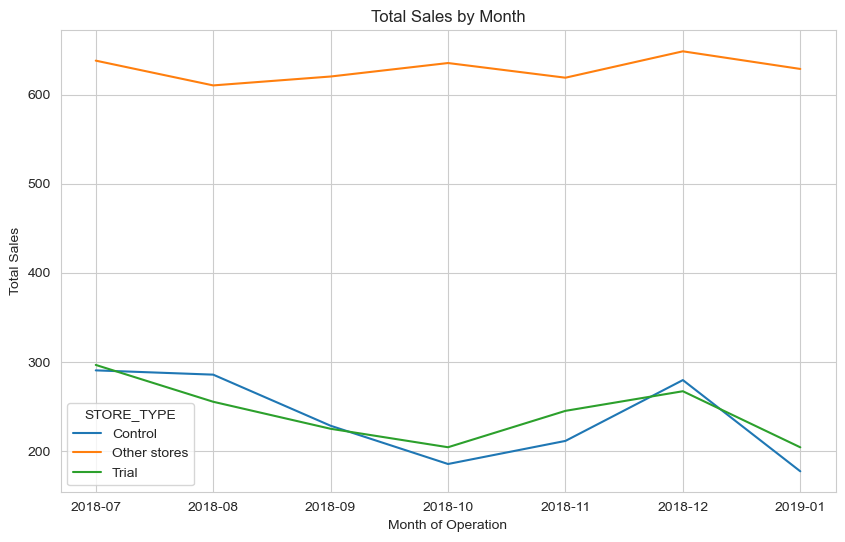

In [22]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales, x='YEARMONTH', y='totSales', hue='STORE_TYPE')
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.show()

In [23]:
grouped_sales1 = pre_trial_measures.groupby(['YEARMONTH', 'STORE_TYPE'])['nCustomers'].mean().reset_index()

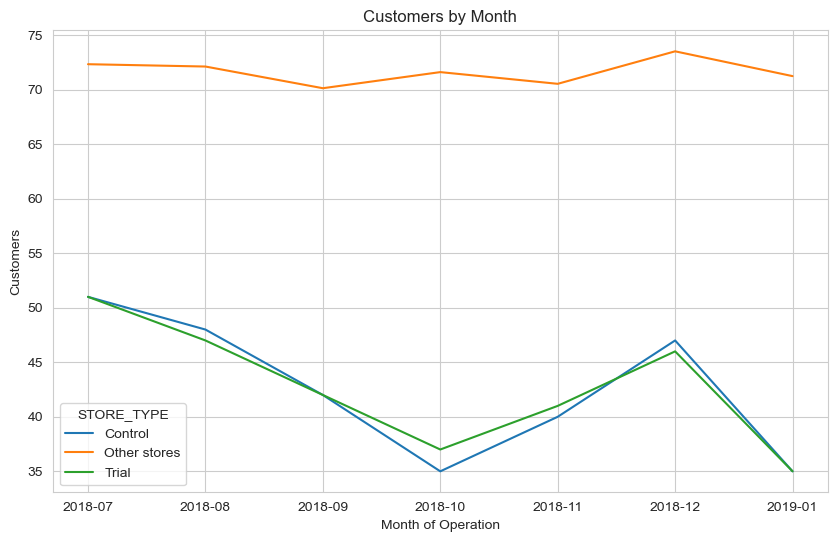

In [24]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales1, x='YEARMONTH', y='nCustomers', hue='STORE_TYPE')
plt.title('Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Customers')
plt.show()

*<span style="font-size:16px;">As we can see from the graphs, both Sales and Customers metrics are similar in trial and control store</span>*

*<span style="font-size:16px;">The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.
We'll start with scaling the control store's sales to a level similar to control
for any differences between the two stores outside of the trial period.</span>*

In [25]:
# Sum of sales for the trial store
sum_sales_trial = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['totSales'].sum()

# Sum of sales for the control store
sum_sales_control = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['totSales'].sum()

# Calculate the scaling factor
scaling_factor = sum_sales_trial / sum_sales_control

In [26]:
monthly_metrics['scaledControlSales'] = monthly_metrics.apply(
    lambda row: row['totSales'] * scaling_factor if row['STORE_NBR'] == control_store else None,
    axis=1
)
monthly_metrics

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTransactions,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,scaledControlSales
0,1,2018-07,206.9,49,52,1.061224,1.192308,3.337097,NaN
1,1,2018-08,176.1,42,43,1.023810,1.255814,3.261111,NaN
2,1,2018-09,278.8,59,62,1.050847,1.209677,3.717333,NaN
3,1,2018-10,188.1,44,45,1.022727,1.288889,3.243103,NaN
4,1,2018-11,192.6,46,47,1.021739,1.212766,3.378947,NaN
...,...,...,...,...,...,...,...,...,...
3164,272,2019-02,395.5,45,48,1.066667,1.895833,4.346154,NaN
3165,272,2019-03,442.3,50,53,1.060000,1.905660,4.379208,NaN
3166,272,2019-04,445.1,54,55,1.018519,1.909091,4.239048,NaN
3167,272,2019-05,314.6,34,40,1.176471,1.775000,4.430986,NaN


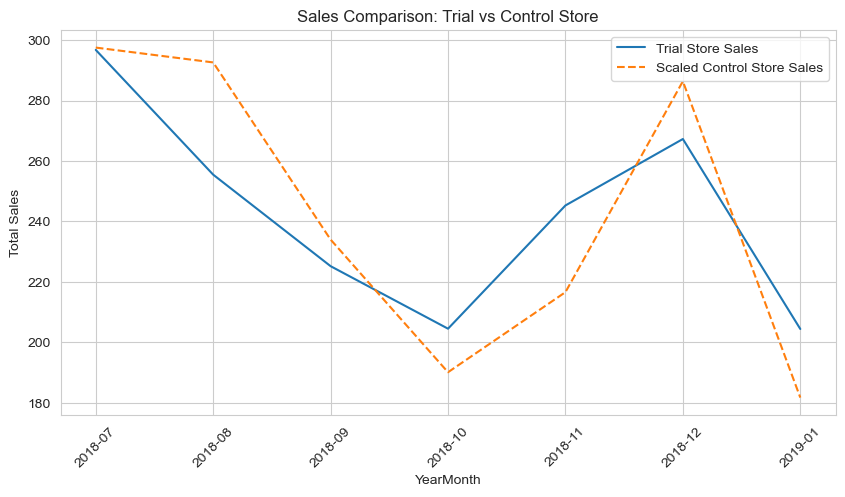

In [27]:
# Filter data for plotting
plot_data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) & (monthly_metrics['YEARMONTH'] < '2019-02')]
plot_data_trial = plot_data[plot_data['STORE_NBR'] == trial_store]
plot_data_control = plot_data[plot_data['STORE_NBR'] == control_store]

plt.figure(figsize=(10, 5))
plt.plot(plot_data_trial['YEARMONTH'], plot_data_trial['totSales'], label='Trial Store Sales')
plt.plot(plot_data_control['YEARMONTH'], plot_data_control['scaledControlSales'], label='Scaled Control Store Sales', linestyle='--')
plt.title('Sales Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

*<span style="font-size:16px;">Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.</span>*


In [28]:
# Filter for the trial period and relevant stores
trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2019-02') &
    (monthly_metrics['YEARMONTH'] <= '2019-04')
]
trial_period_data

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTransactions,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,scaledControlSales
887,77,2019-02,235.0,45,45,1.000000,1.644444,3.175676,NaN
888,77,2019-03,278.5,50,55,1.100000,1.490909,3.396341,NaN
889,77,2019-04,263.5,47,48,1.021277,1.625000,3.378205,NaN
2706,233,2019-02,244.0,45,47,1.044444,1.489362,3.485714,249.762622
2707,233,2019-03,199.1,40,41,1.025000,1.439024,3.374576,203.802205
2708,233,2019-04,158.6,30,32,1.066667,1.437500,3.447826,162.345704


In [29]:
# Pivot the data
comparison_df = trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='totSales')

# Add scaledControlSales to the comparison DataFrame
comparison_df['scaledControlSales'] = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['scaledControlSales'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df.reset_index(inplace=True)
comparison_df['percentageDiff'] = 100 * (comparison_df[trial_store] - comparison_df['scaledControlSales']) / comparison_df['scaledControlSales']
print(comparison_df[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2019-02       -5.910661
1           2019-03       36.652103
2           2019-04       62.307960


In [30]:
# Filter for the trial period and relevant stores
pre_trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2018-07') &
    (monthly_metrics['YEARMONTH'] <= '2019-01')
]
pre_trial_period_data

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTransactions,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,scaledControlSales
880,77,2018-07,296.8,51,55,1.078431,1.527273,3.533333,NaN
881,77,2018-08,255.5,47,48,1.021277,1.541667,3.452703,NaN
882,77,2018-09,225.2,42,44,1.047619,1.590909,3.217143,NaN
883,77,2018-10,204.5,37,38,1.027027,1.368421,3.932692,NaN
884,77,2018-11,245.3,41,44,1.073171,1.522727,3.661194,NaN
885,77,2018-12,267.3,46,48,1.043478,1.500000,3.712500,NaN
886,77,2019-01,204.4,35,39,1.114286,1.666667,3.144615,NaN
2699,233,2018-07,290.7,51,54,1.058824,1.629630,3.303409,297.565550
2700,233,2018-08,285.9,48,50,1.041667,1.600000,3.573750,292.652187
2701,233,2018-09,228.6,42,45,1.071429,1.555556,3.265714,233.998916


In [31]:
# Pivot the data
comparison_df_p = pre_trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='totSales')

# Add scaledControlSales to the comparison DataFrame
comparison_df_p['scaledControlSales'] = pre_trial_period_data[pre_trial_period_data['STORE_NBR'] == control_store]['scaledControlSales'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df_p.reset_index(inplace=True)
comparison_df_p['percentageDiff'] = 100 * (comparison_df_p[trial_store] - comparison_df_p['scaledControlSales']) / comparison_df_p['scaledControlSales']
print(comparison_df_p[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2018-07       -0.257271
1           2018-08      -12.694997
2           2018-09       -3.760238
3           2018-10        7.583035
4           2018-11       13.251579
5           2018-12       -6.671641
6           2019-01       12.498029


In [32]:
# Filter for pre-trial period and calculate standard deviation
pre_trial_diffs = comparison_df_p['percentageDiff']
std_dev = pre_trial_diffs.std()
degrees_of_freedom = len(pre_trial_diffs) - 1  # 6 degrees of freedom if there are 7 months in the pre-trial
std_dev

9.958646884078389

*<span style="font-size:16px;">Let's see if the difference is significant! As our null hypothesis is that the trial period is the same as the pre-trial
period, let's take the standard deviation based on the scaled percentage difference
in the pre-trial period </span>*

In [33]:
# Filter the data to include only the trial period months
trial_diffs = comparison_df[(comparison_df['YEARMONTH'] >= '2019-02') & (comparison_df['YEARMONTH'] <= '2019-04')]

# Calculate the t-values for the trial months
trial_diffs['tValue'] = trial_diffs['percentageDiff'].apply(lambda x: x / std_dev)

In [34]:
# Get the critical t-value for 95% CI, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, degrees_of_freedom)  # 0.025 = 5%/2 for two tails

In [35]:
trial_diffs['is_significant'] = trial_diffs['tValue'].abs() > t_critical
print(trial_diffs[['YEARMONTH', 'percentageDiff', 'tValue', 'is_significant']])

STORE_NBR YEARMONTH  percentageDiff    tValue  is_significant
0           2019-02       -5.910661 -0.593520           False
1           2019-03       36.652103  3.680430            True
2           2019-04       62.307960  6.256669            True


*<span style="font-size:16px;">We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store.</span>*

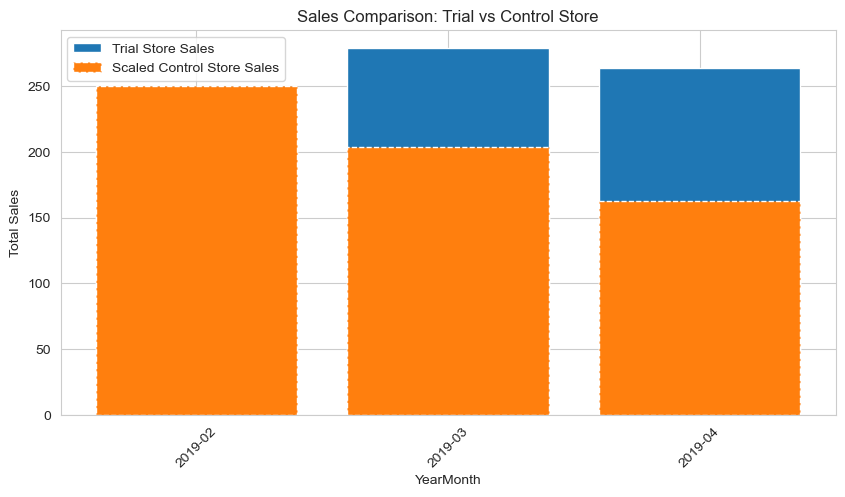

In [36]:
plt.figure(figsize=(10, 5))
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['totSales'], label='Trial Store Sales')
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['scaledControlSales'], label='Scaled Control Store Sales', linestyle='--')
plt.title('Sales Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**<span style="font-size:18px;">Let's do the same for customers</span>**

In [37]:
sum_cust_trial = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['nCustomers'].sum()
sum_cust_control = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['nCustomers'].sum()

# Calculate the scaling factor
scaling_factor = sum_cust_trial / sum_cust_control
scaling_factor
sum_cust_control

298

In [38]:
monthly_metrics['scaledControlCust'] = monthly_metrics.apply(
    lambda row: row['nCustomers'] * scaling_factor if row['STORE_NBR'] == control_store else None,
    axis=1
)


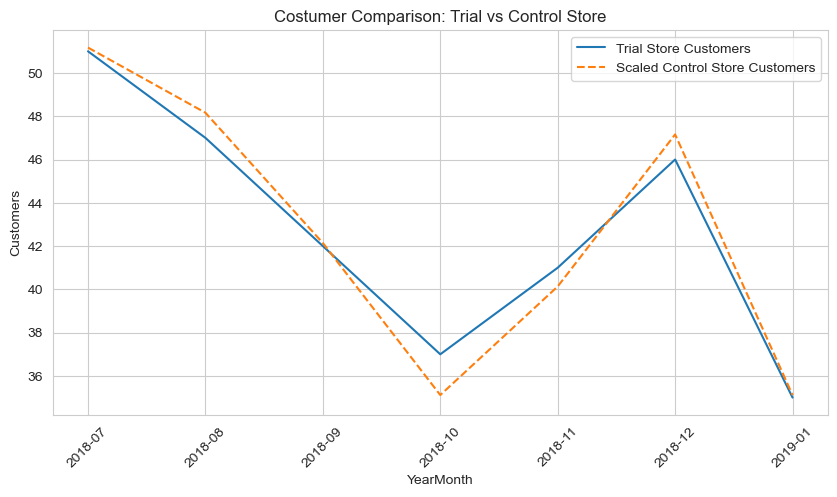

In [39]:
# Filter data for plotting
plot_data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) & (monthly_metrics['YEARMONTH'] < '2019-02')]
plot_data_trial = plot_data[plot_data['STORE_NBR'] == trial_store]
plot_data_control = plot_data[plot_data['STORE_NBR'] == control_store]

plt.figure(figsize=(10, 5))
plt.plot(plot_data_trial['YEARMONTH'], plot_data_trial['nCustomers'], label='Trial Store Customers')
plt.plot(plot_data_control['YEARMONTH'], plot_data_control['scaledControlCust'], label='Scaled Control Store Customers', linestyle='--')
plt.title('Costumer Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Filter for the trial period and relevant stores
trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2019-02') &
    (monthly_metrics['YEARMONTH'] <= '2019-04')
]

In [41]:
# Pivot the data
comparison_df = trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='nCustomers')

# Add scaledControlSales to the comparison DataFrame
comparison_df['scaledControlCust'] = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['scaledControlCust'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df.reset_index(inplace=True)
comparison_df['percentageDiff'] = 100 * (comparison_df[trial_store] - comparison_df['scaledControlCust']) / comparison_df['scaledControlCust']
print(comparison_df[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2019-02       -0.334448
1           2019-03       24.581940
2           2019-04       56.142698


In [42]:
# Filter for the trial period and relevant stores
pre_trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2018-07') &
    (monthly_metrics['YEARMONTH'] <= '2019-01')
]

In [43]:
# Pivot the data
comparison_df_p = pre_trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='nCustomers')

# Add scaledControlSales to the comparison DataFrame
comparison_df_p['scaledControlCust'] = pre_trial_period_data[pre_trial_period_data['STORE_NBR'] == control_store]['scaledControlCust'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df_p.reset_index(inplace=True)
comparison_df_p['percentageDiff'] = 100 * (comparison_df_p[trial_store] - comparison_df_p['scaledControlCust']) / comparison_df_p['scaledControlCust']
print(comparison_df_p[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2018-07       -0.334448
1           2018-08       -2.410814
2           2018-09       -0.334448
3           2018-10        5.360726
4           2018-11        2.157191
5           2018-12       -2.454992
6           2019-01       -0.334448


In [44]:
# Filter for pre-trial period and calculate standard deviation
pre_trial_diffs = comparison_df_p['percentageDiff']
std_dev = pre_trial_diffs.std()
degrees_of_freedom = len(pre_trial_diffs) - 1  # 6 degrees of freedom if there are 7 months in the pre-trial
std_dev

2.7439960090778928

In [45]:
# Filter the data to include only the trial period months
trial_diffs = comparison_df[(comparison_df['YEARMONTH'] >= '2019-02') & (comparison_df['YEARMONTH'] <= '2019-04')]

# Calculate the t-values for the trial months
trial_diffs['tValue'] = trial_diffs['percentageDiff'].apply(lambda x: x / std_dev)

In [46]:
# Get the critical t-value for 95% CI, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, degrees_of_freedom)  # 0.025 = 5%/2 for two tails

In [47]:
trial_diffs['is_significant'] = trial_diffs['tValue'].abs() > t_critical
print(trial_diffs[['YEARMONTH', 'percentageDiff', 'tValue', 'is_significant']])

STORE_NBR YEARMONTH  percentageDiff     tValue  is_significant
0           2019-02       -0.334448  -0.121884           False
1           2019-03       24.581940   8.958446            True
2           2019-04       56.142698  20.460197            True


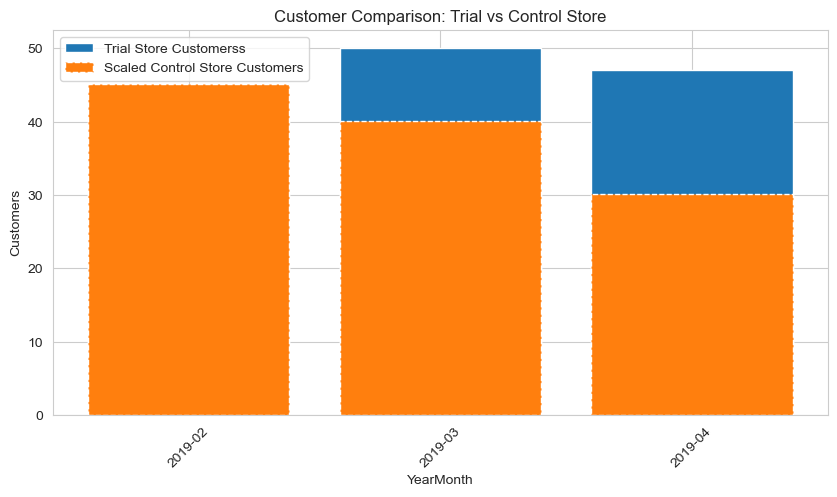

In [48]:
plt.figure(figsize=(10, 5))
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['nCustomers'], label='Trial Store Customerss')
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['scaledControlCust'], label='Scaled Control Store Customers', linestyle='--')
plt.title('Customer Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**<span style="font-size:20px;">Let's explore next trial store - 86</span>**

In [49]:
# Example usage
result_corr1 = calculate_correlation(pre_trial_measures, 'totSales', 86)
result_corr2 = calculate_correlation(pre_trial_measures, 'nCustomers', 86)

In [50]:
merged_b=pd.merge(result_corr1, result_corr2, on='Store2')
merged_b= merged_b.drop('Store1_y', axis=1)
merged_b.rename(columns={'Store1_x': 'Store1', 'corr_measure_x': 'Corr_Sales', 'corr_measure_y': 'Corr_Customers'}, inplace=True)


In [51]:
result_c = calculate_magnitude_distance(pre_trial_measures, 'totSales', 86)
result_m = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', 86)

In [52]:
merged_c = pd.merge(result_c, result_m, on='Store2')
merged_c= merged_c.drop('Store1_y', axis=1)
merged_c.rename(columns={'Store1_x': 'Store1', 'mag_measure_x': 'Mag_Sales', 'mag_measure_y': 'Mag_Customers'}, inplace=True)


In [53]:
merged_d = pd.merge(merged_c, merged_b, on='Store2')
merged_d= merged_d.drop('Store1_y', axis=1)
merged_d.rename(columns={'Store1_x': 'Store1'}, inplace=True)


In [54]:
merged_d['Score_Sales'] = 0.5 * merged_d['Mag_Sales']+ 0.5 * merged_d['Corr_Sales']
merged_d['Score_Customers'] = 0.5 * merged_d['Mag_Customers']+ 0.5 * merged_d['Corr_Customers']

In [55]:
merged_d['Score_Control'] = 0.5 * merged_d['Score_Sales']+ 0.5 * merged_d['Score_Customers']

In [56]:
max_row = merged_d.loc[merged_d['Score_Control'].idxmax()]
# Display the store2 with the highest correlation to store1
print("Store2 with the highest Score_Control to Store1:", max_row['Store2'])

Store2 with the highest Score_Control to Store1: 155.0


*<span style="font-size:16px;">Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.</span>*


In [57]:
trial_store = 86  
control_store = 155  
# Classify store type
pre_trial_measures['STORE_TYPE'] =np.where(pre_trial_measures['STORE_NBR'] == trial_store, 'Trial',
                                         np.where(pre_trial_measures['STORE_NBR'] == control_store, 'Control', 'Other stores'))

# Calculate mean total sales by 'YEARMONTH' and 'Store_type'
grouped_sales = pre_trial_measures.groupby(['YEARMONTH', 'STORE_TYPE'])['totSales'].mean().reset_index()

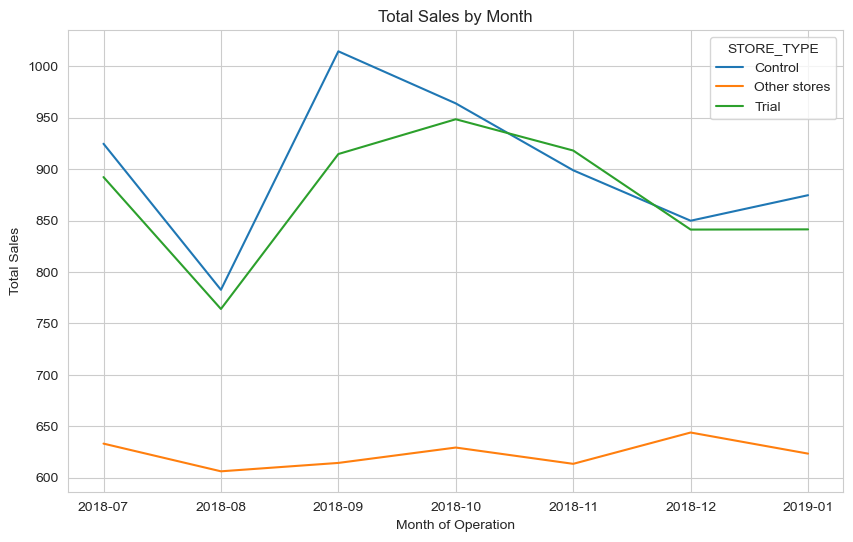

In [58]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales, x='YEARMONTH', y='totSales', hue='STORE_TYPE')
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.show()

In [59]:
# Calculate mean total sales by 'YEARMONTH' and 'Store_type'
grouped_sales1 = pre_trial_measures.groupby(['YEARMONTH', 'STORE_TYPE'])['nCustomers'].mean().reset_index()

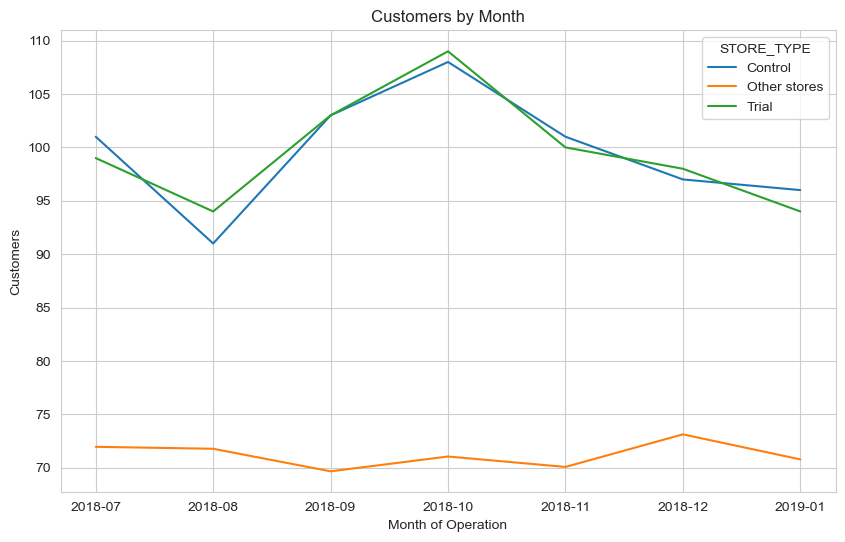

In [60]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales1, x='YEARMONTH', y='nCustomers', hue='STORE_TYPE')
plt.title('Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Customers')
plt.show()

In [61]:
# Sum of sales for the trial store
sum_sales_trial = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['totSales'].sum()

# Sum of sales for the control store
sum_sales_control = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['totSales'].sum()

# Calculate the scaling factor
scaling_factor = sum_sales_trial / sum_sales_control

In [62]:
monthly_metrics['scaledControlSales'] = monthly_metrics.apply(
    lambda row: row['totSales'] * scaling_factor if row['STORE_NBR'] == control_store else None,
    axis=1
)

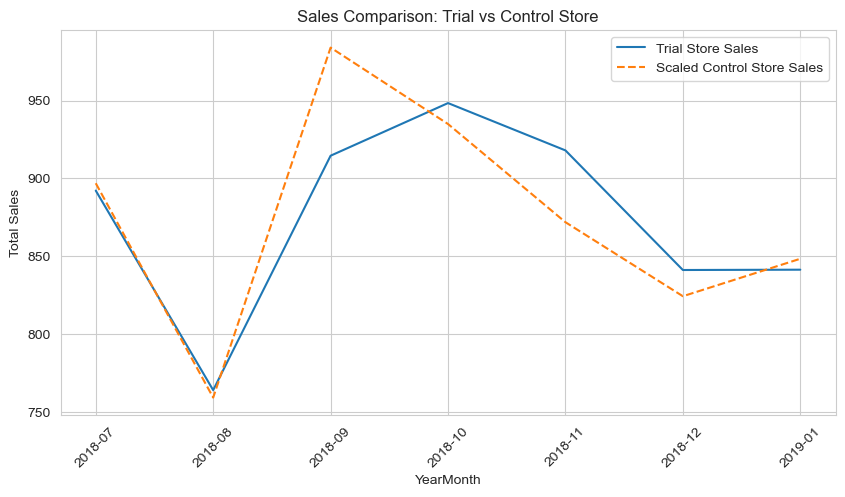

In [63]:
# Filter data for plotting
plot_data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) & (monthly_metrics['YEARMONTH'] < '2019-02')]
plot_data_trial = plot_data[plot_data['STORE_NBR'] == trial_store]
plot_data_control = plot_data[plot_data['STORE_NBR'] == control_store]

plt.figure(figsize=(10, 5))
plt.plot(plot_data_trial['YEARMONTH'], plot_data_trial['totSales'], label='Trial Store Sales')
plt.plot(plot_data_control['YEARMONTH'], plot_data_control['scaledControlSales'], label='Scaled Control Store Sales', linestyle='--')
plt.title('Sales Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

*<span style="font-size:16px;">Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.</span>*


In [64]:
# Filter for the trial period and relevant stores
trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2019-02') &
    (monthly_metrics['YEARMONTH'] <= '2019-04')
]

In [65]:
# Pivot the data
comparison_df = trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='totSales')

# Add scaledControlSales to the comparison DataFrame
comparison_df['scaledControlSales'] = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['scaledControlSales'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df.reset_index(inplace=True)
comparison_df['percentageDiff'] = 100 * (comparison_df[trial_store] - comparison_df['scaledControlSales']) / comparison_df['scaledControlSales']
print(comparison_df[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2019-02        5.630619
1           2019-03       31.586973
2           2019-04        3.525250


In [66]:
# Filter for the trial period and relevant stores
pre_trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2018-07') &
    (monthly_metrics['YEARMONTH'] <= '2019-01')
]

In [67]:
# Pivot the data
comparison_df_p = pre_trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='totSales')

# Add scaledControlSales to the comparison DataFrame
comparison_df_p['scaledControlSales'] = pre_trial_period_data[pre_trial_period_data['STORE_NBR'] == control_store]['scaledControlSales'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df_p.reset_index(inplace=True)
comparison_df_p['percentageDiff'] = 100 * (comparison_df_p[trial_store] - comparison_df_p['scaledControlSales']) / comparison_df_p['scaledControlSales']
print(comparison_df_p[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2018-07       -0.526493
1           2018-08        0.629553
2           2018-09       -7.056065
3           2018-10        1.438711
4           2018-11        5.287961
5           2018-12        2.042628
6           2019-01       -0.827301


In [68]:
# Filter for pre-trial period and calculate standard deviation
pre_trial_diffs = comparison_df_p['percentageDiff']
std_dev = pre_trial_diffs.std()
degrees_of_freedom = len(pre_trial_diffs) - 1  # 6 degrees of freedom if there are 7 months in the pre-trial
std_dev

3.768532790008376

In [69]:
# Filter the data to include only the trial period months
trial_diffs = comparison_df[(comparison_df['YEARMONTH'] >= '2019-02') & (comparison_df['YEARMONTH'] <= '2019-04')]

# Calculate the t-values for the trial months
trial_diffs['tValue'] = trial_diffs['percentageDiff'].apply(lambda x: x / std_dev)

In [70]:
# Get the critical t-value for 95% CI, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, degrees_of_freedom)  # 0.025 = 5%/2 for two tails

In [71]:
trial_diffs['is_significant'] = trial_diffs['tValue'].abs() > t_critical
print(trial_diffs[['YEARMONTH', 'percentageDiff', 'tValue', 'is_significant']])

STORE_NBR YEARMONTH  percentageDiff    tValue  is_significant
0           2019-02        5.630619  1.494114           False
1           2019-03       31.586973  8.381769            True
2           2019-04        3.525250  0.935444           False


*<span style="font-size:16px;">We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March  - i.e. the increase in sales in the trial
store in March is statistically greater than in the control store.</span>*

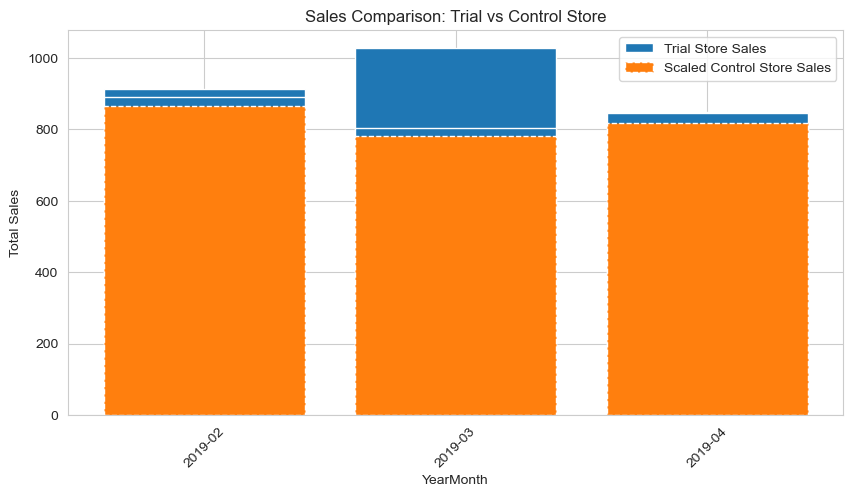

In [72]:
plt.figure(figsize=(10, 5))
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['totSales'], label='Trial Store Sales')
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['scaledControlSales'], label='Scaled Control Store Sales', linestyle='--')
plt.title('Sales Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**<span style="font-size:18px;">Let's do the same for customers</span>**

In [73]:
sum_cust_trial = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['nCustomers'].sum()


sum_cust_control = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['nCustomers'].sum()

# Calculate the scaling factor
scaling_factor = sum_cust_trial / sum_cust_control
scaling_factor


1.0

In [74]:
monthly_metrics['scaledControlCust'] = monthly_metrics.apply(
    lambda row: row['nCustomers'] * scaling_factor if row['STORE_NBR'] == control_store else None,
    axis=1
)

**<span style="font-size:18px;">Summarising the individual words in the product name</span>**

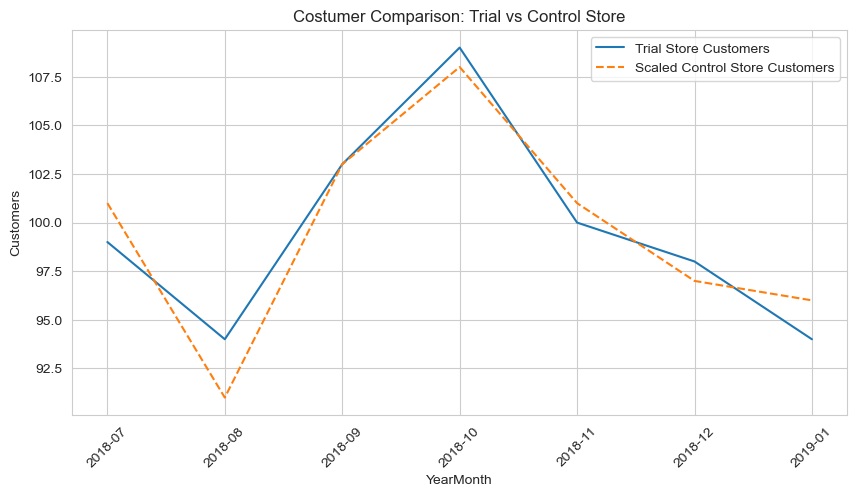

In [75]:
# Filter data for plotting
plot_data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) & (monthly_metrics['YEARMONTH'] < '2019-02')]
plot_data_trial = plot_data[plot_data['STORE_NBR'] == trial_store]
plot_data_control = plot_data[plot_data['STORE_NBR'] == control_store]

plt.figure(figsize=(10, 5))
plt.plot(plot_data_trial['YEARMONTH'], plot_data_trial['nCustomers'], label='Trial Store Customers')
plt.plot(plot_data_control['YEARMONTH'], plot_data_control['scaledControlCust'], label='Scaled Control Store Customers', linestyle='--')
plt.title('Costumer Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Filter for the trial period and relevant stores
trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2019-02') &
    (monthly_metrics['YEARMONTH'] <= '2019-04')
]

In [77]:
# Pivot the data
comparison_df = trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='nCustomers')

# Add scaledControlSales to the comparison DataFrame
comparison_df['scaledControlCust'] = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['scaledControlCust'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df.reset_index(inplace=True)
comparison_df['percentageDiff'] = 100 * (comparison_df[trial_store] - comparison_df['scaledControlCust']) / comparison_df['scaledControlCust']
print(comparison_df[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2019-02       12.631579
1           2019-03       22.340426
2           2019-04        6.060606


In [78]:
# Filter for the trial period and relevant stores
pre_trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2018-07') &
    (monthly_metrics['YEARMONTH'] <= '2019-01')
]

In [79]:
# Pivot the data
comparison_df_p = pre_trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='nCustomers')

# Add scaledControlSales to the comparison DataFrame
comparison_df_p['scaledControlCust'] = pre_trial_period_data[pre_trial_period_data['STORE_NBR'] == control_store]['scaledControlCust'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df_p.reset_index(inplace=True)
comparison_df_p['percentageDiff'] = 100 * (comparison_df_p[trial_store] - comparison_df_p['scaledControlCust']) / comparison_df_p['scaledControlCust']
print(comparison_df_p[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2018-07       -1.980198
1           2018-08        3.296703
2           2018-09        0.000000
3           2018-10        0.925926
4           2018-11       -0.990099
5           2018-12        1.030928
6           2019-01       -2.083333


In [80]:
# Filter for pre-trial period and calculate standard deviation
pre_trial_diffs = comparison_df_p['percentageDiff']
std_dev = pre_trial_diffs.std()
degrees_of_freedom = len(pre_trial_diffs) - 1  # 7 degrees of freedom if there are 8 months in the pre-trial
std_dev

1.9159180382211953

In [81]:
# Filter the data to include only the trial period months
trial_diffs = comparison_df[(comparison_df['YEARMONTH'] >= '2019-02') & (comparison_df['YEARMONTH'] <= '2019-04')]

# Calculate the t-values for the trial months
trial_diffs['tValue'] = trial_diffs['percentageDiff'].apply(lambda x: x / std_dev)

In [82]:
# Get the critical t-value for 95% CI, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, degrees_of_freedom)  # 0.025 = 5%/2 for two tails

In [83]:
trial_diffs['is_significant'] = trial_diffs['tValue'].abs() > t_critical
print(trial_diffs[['YEARMONTH', 'percentageDiff', 'tValue', 'is_significant']])

STORE_NBR YEARMONTH  percentageDiff     tValue  is_significant
0           2019-02       12.631579   6.592964            True
1           2019-03       22.340426  11.660429            True
2           2019-04        6.060606   3.163291            True


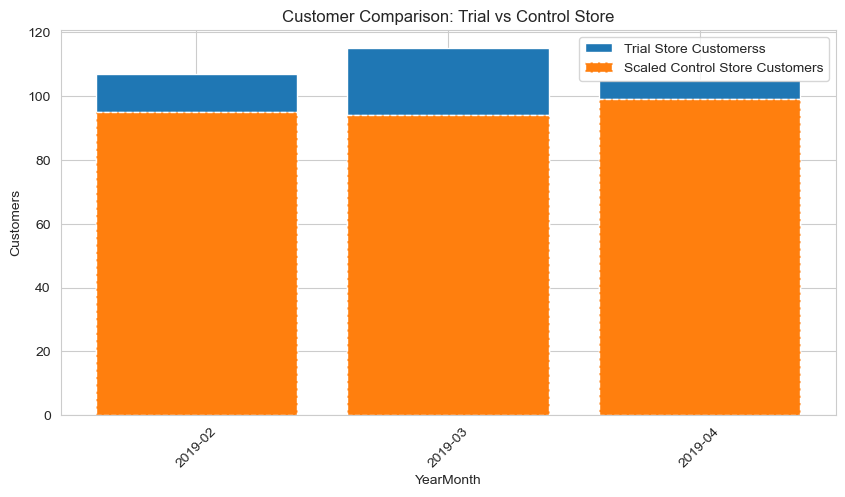

In [84]:
plt.figure(figsize=(10, 5))
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['nCustomers'], label='Trial Store Customerss')
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['scaledControlCust'], label='Scaled Control Store Customers', linestyle='--')
plt.title('Customer Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**<span style="font-size:20px;">Let's explore next trial store - 88</span>**

In [85]:
# Example usage
result_corr1 = calculate_correlation(pre_trial_measures, 'totSales', 88)
result_corr2 = calculate_correlation(pre_trial_measures, 'nCustomers', 88)

In [86]:
merged_b=pd.merge(result_corr1, result_corr2, on='Store2')
merged_b= merged_b.drop('Store1_y', axis=1)
merged_b.rename(columns={'Store1_x': 'Store1', 'corr_measure_x': 'Corr_Sales', 'corr_measure_y': 'Corr_Customers'}, inplace=True)

In [87]:
result_c = calculate_magnitude_distance(pre_trial_measures, 'totSales', 88)
result_m = calculate_magnitude_distance(pre_trial_measures, 'nCustomers', 88)

In [88]:
merged_c = pd.merge(result_c, result_m, on='Store2')
merged_c= merged_c.drop('Store1_y', axis=1)
merged_c.rename(columns={'Store1_x': 'Store1', 'mag_measure_x': 'Mag_Sales', 'mag_measure_y': 'Mag_Customers'}, inplace=True)

In [89]:
merged_d = pd.merge(merged_c, merged_b, on='Store2')
merged_d= merged_d.drop('Store1_y', axis=1)
merged_d.rename(columns={'Store1_x': 'Store1'}, inplace=True)
merged_d

,Store1,Store2,Mag_Sales,Mag_Customers,Corr_Sales,Corr_Customers
0,88,1,0.142830,0.351219,0.813636,0.305334
1,88,2,0.115895,0.300329,-0.067927,-0.452379
2,88,3,0.802803,0.843685,-0.507847,0.522884
3,88,4,0.897661,0.924507,-0.745566,-0.361503
4,88,5,0.610161,0.737229,0.190330,-0.025320
...,...,...,...,...,...,...
254,88,268,0.160968,0.335512,-0.021429,0.672672
255,88,269,0.709806,0.847040,-0.172578,-0.274781
256,88,270,0.714835,0.833427,-0.723272,-0.103032
257,88,271,0.613314,0.738290,-0.103037,-0.018831


In [90]:
merged_d['Score_Sales'] = 0.5 * merged_d['Mag_Sales']+ 0.5 * merged_d['Corr_Sales']
merged_d['Score_Customers'] = 0.5 * merged_d['Mag_Customers']+ 0.5 * merged_d['Corr_Customers']

In [91]:
merged_d['Score_Control'] = 0.5 * merged_d['Score_Sales']+ 0.5 * merged_d['Score_Customers']

In [92]:
max_row = merged_d.loc[merged_d['Score_Control'].idxmax()]
# Display the store2 with the highest correlation to store1
print("Store2 with the highest Score_Control to Store1:", max_row['Store2'])

Store2 with the highest Score_Control to Store1: 237.0


*<span style="font-size:16px;">Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.</span>*


In [93]:
trial_store = 88  
control_store = 237
# Classify store type
pre_trial_measures['STORE_TYPE'] =np.where(pre_trial_measures['STORE_NBR'] == trial_store, 'Trial',
                                         np.where(pre_trial_measures['STORE_NBR'] == control_store, 'Control', 'Other stores'))

# Calculate mean total sales by 'YEARMONTH' and 'Store_type'
grouped_sales = pre_trial_measures.groupby(['YEARMONTH', 'STORE_TYPE'])['totSales'].mean().reset_index()

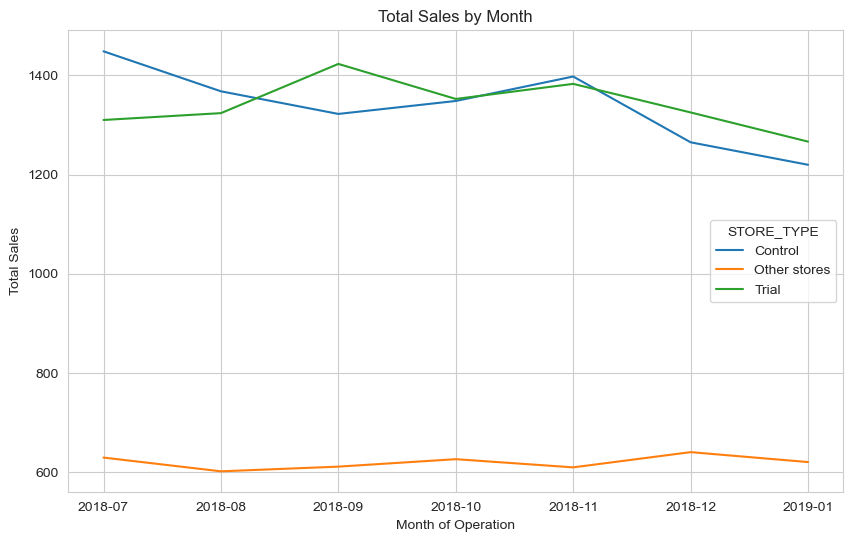

In [94]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales, x='YEARMONTH', y='totSales', hue='STORE_TYPE')
plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')
plt.show()

In [95]:
# Calculate mean total sales by 'YEARMONTH' and 'Store_type'
grouped_sales1 = pre_trial_measures.groupby(['YEARMONTH', 'STORE_TYPE'])['nCustomers'].mean().reset_index()

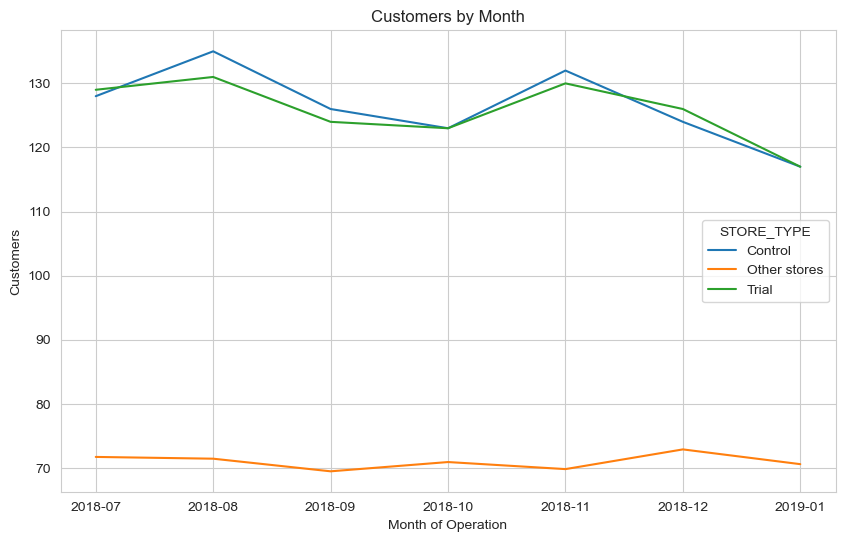

In [96]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales1, x='YEARMONTH', y='nCustomers', hue='STORE_TYPE')
plt.title('Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Customers')
plt.show()

In [97]:
# Sum of sales for the trial store
sum_sales_trial = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['totSales'].sum()

# Sum of sales for the control store
sum_sales_control = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['totSales'].sum()

# Calculate the scaling factor
scaling_factor = sum_sales_trial / sum_sales_control

In [98]:
monthly_metrics['scaledControlSales'] = monthly_metrics.apply(
    lambda row: row['totSales'] * scaling_factor if row['STORE_NBR'] == control_store else None,
    axis=1
)

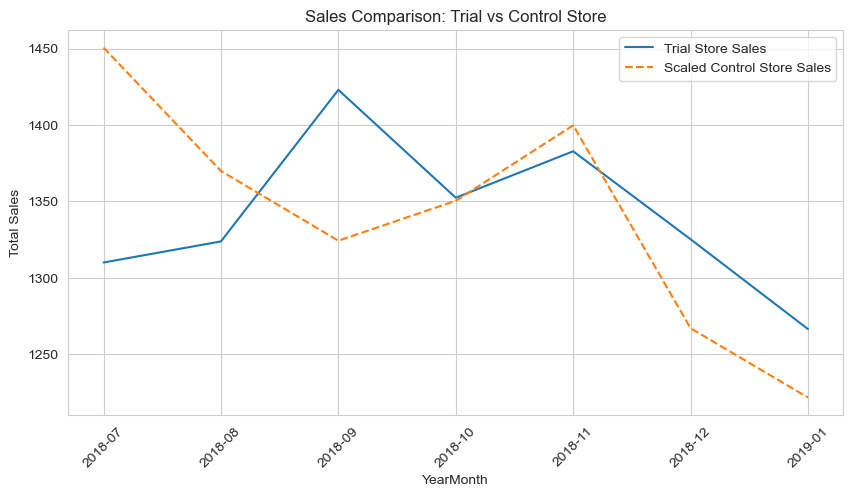

In [99]:
# Filter data for plotting
plot_data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) & (monthly_metrics['YEARMONTH'] < '2019-02')]
plot_data_trial = plot_data[plot_data['STORE_NBR'] == trial_store]
plot_data_control = plot_data[plot_data['STORE_NBR'] == control_store]

plt.figure(figsize=(10, 5))
plt.plot(plot_data_trial['YEARMONTH'], plot_data_trial['totSales'], label='Trial Store Sales')
plt.plot(plot_data_control['YEARMONTH'], plot_data_control['scaledControlSales'], label='Scaled Control Store Sales', linestyle='--')
plt.title('Sales Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

*<span style="font-size:16px;">Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.</span>*


In [100]:
# Filter for the trial period and relevant stores
trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2019-02') &
    (monthly_metrics['YEARMONTH'] <= '2019-04')
]

In [101]:
# Pivot the data
comparison_df = trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='totSales')

# Add scaledControlSales to the comparison DataFrame
comparison_df['scaledControlSales'] = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['scaledControlSales'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df.reset_index(inplace=True)
comparison_df['percentageDiff'] = 100 * (comparison_df[trial_store] - comparison_df['scaledControlSales']) / comparison_df['scaledControlSales']
print(comparison_df[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2019-02       -2.614742
1           2019-03       22.074294
2           2019-04       19.306029


In [102]:
# Filter for the trial period and relevant stores
pre_trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2018-07') &
    (monthly_metrics['YEARMONTH'] <= '2019-01')
]

In [103]:
# Pivot the data
comparison_df_p = pre_trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='totSales')

# Add scaledControlSales to the comparison DataFrame
comparison_df_p['scaledControlSales'] = pre_trial_period_data[pre_trial_period_data['STORE_NBR'] == control_store]['scaledControlSales'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df_p.reset_index(inplace=True)
comparison_df_p['percentageDiff'] = 100 * (comparison_df_p[trial_store] - comparison_df_p['scaledControlSales']) / comparison_df_p['scaledControlSales']
print(comparison_df_p[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2018-07       -9.696095
1           2018-08       -3.367430
2           2018-09        7.456205
3           2018-10        0.148023
4           2018-11       -1.212901
5           2018-12        4.595898
6           2019-01        3.667262


In [104]:
# Filter for pre-trial period and calculate standard deviation
pre_trial_diffs = comparison_df_p['percentageDiff']
std_dev = pre_trial_diffs.std()
degrees_of_freedom = len(pre_trial_diffs) - 1  # 6 degrees of freedom if there are 7 months in the pre-trial
std_dev

5.724965451900226

In [105]:
# Filter the data to include only the trial period months
trial_diffs = comparison_df[(comparison_df['YEARMONTH'] >= '2019-02') & (comparison_df['YEARMONTH'] <= '2019-04')]

# Calculate the t-values for the trial months
trial_diffs['tValue'] = trial_diffs['percentageDiff'].apply(lambda x: x / std_dev)

In [106]:
# Get the critical t-value for 95% CI, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, degrees_of_freedom)  # 0.025 = 5%/2 for two tails

In [107]:
trial_diffs['is_significant'] = trial_diffs['tValue'].abs() > t_critical
print(trial_diffs[['YEARMONTH', 'percentageDiff', 'tValue', 'is_significant']])

STORE_NBR YEARMONTH  percentageDiff    tValue  is_significant
0           2019-02       -2.614742 -0.456726           False
1           2019-03       22.074294  3.855795            True
2           2019-04       19.306029  3.372253            True


*<span style="font-size:16px;">We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April  - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store.</span>*

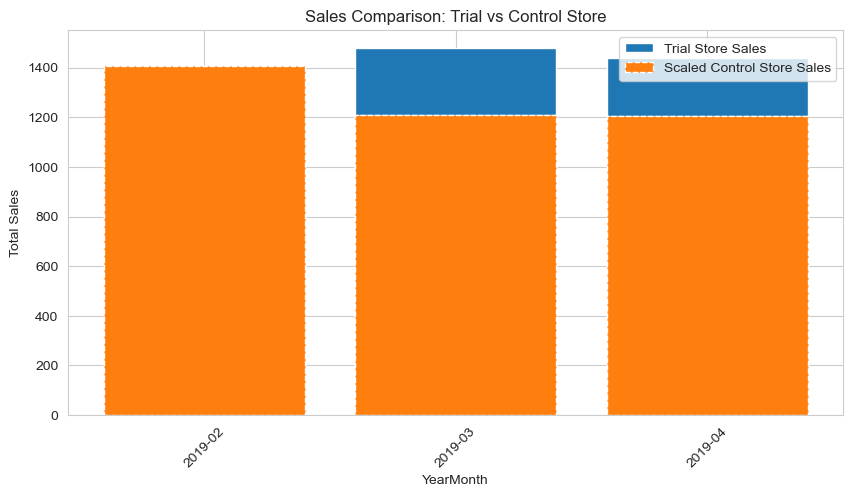

In [108]:
plt.figure(figsize=(10, 5))
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['totSales'], label='Trial Store Sales')
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['scaledControlSales'], label='Scaled Control Store Sales', linestyle='--')
plt.title('Sales Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**<span style="font-size:18px;">Let's do the same for customers</span>**

In [109]:
sum_cust_trial = pre_trial_measures[pre_trial_measures['STORE_NBR'] == trial_store]['nCustomers'].sum()

sum_cust_control = pre_trial_measures[pre_trial_measures['STORE_NBR'] == control_store]['nCustomers'].sum()

# Calculate the scaling factor
scaling_factor = sum_cust_trial / sum_cust_control


In [110]:
monthly_metrics['scaledControlCust'] = monthly_metrics.apply(
    lambda row: row['nCustomers'] * scaling_factor if row['STORE_NBR'] == control_store else None,
    axis=1
)

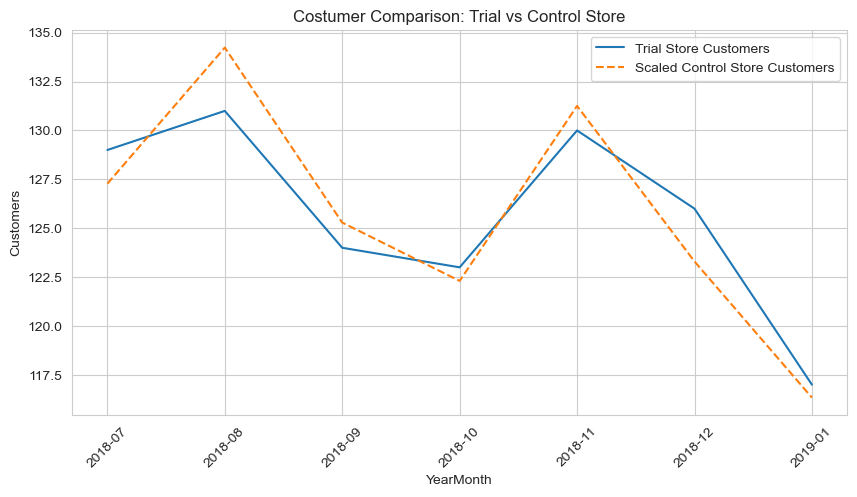

In [111]:
# Filter data for plotting
plot_data = monthly_metrics[(monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) & (monthly_metrics['YEARMONTH'] < '2019-02')]
plot_data_trial = plot_data[plot_data['STORE_NBR'] == trial_store]
plot_data_control = plot_data[plot_data['STORE_NBR'] == control_store]

plt.figure(figsize=(10, 5))
plt.plot(plot_data_trial['YEARMONTH'], plot_data_trial['nCustomers'], label='Trial Store Customers')
plt.plot(plot_data_control['YEARMONTH'], plot_data_control['scaledControlCust'], label='Scaled Control Store Customers', linestyle='--')
plt.title('Costumer Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [112]:
# Filter for the trial period and relevant stores
trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2019-02') &
    (monthly_metrics['YEARMONTH'] <= '2019-04')
]

In [113]:
# Pivot the data
comparison_df = trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='nCustomers')

# Add scaledControlSales to the comparison DataFrame
comparison_df['scaledControlCust'] = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['scaledControlCust'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df.reset_index(inplace=True)
comparison_df['percentageDiff'] = 100 * (comparison_df[trial_store] - comparison_df['scaledControlCust']) / comparison_df['scaledControlCust']
print(comparison_df[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2019-02       -1.028139
1           2019-03       13.244843
2           2019-04        7.272727


In [114]:
# Filter for the trial period and relevant stores
pre_trial_period_data = monthly_metrics[
    (monthly_metrics['STORE_NBR'].isin([trial_store, control_store])) &
    (monthly_metrics['YEARMONTH'] >= '2018-07') &
    (monthly_metrics['YEARMONTH'] <= '2019-01')
]

In [115]:
# Pivot the data
comparison_df_p = pre_trial_period_data.pivot(index='YEARMONTH', columns='STORE_NBR', values='nCustomers')

# Add scaledControlSales to the comparison DataFrame
comparison_df_p['scaledControlCust'] = pre_trial_period_data[pre_trial_period_data['STORE_NBR'] == control_store]['scaledControlCust'].values

# Reset the index to flatten the DataFrame structure after pivot
comparison_df_p.reset_index(inplace=True)
comparison_df_p['percentageDiff'] = 100 * (comparison_df_p[trial_store] - comparison_df_p['scaledControlCust']) / comparison_df_p['scaledControlCust']
print(comparison_df_p[['YEARMONTH', 'percentageDiff']])

STORE_NBR YEARMONTH  percentageDiff
0           2018-07        1.353871
1           2018-08       -2.411616
2           2018-09       -1.028139
3           2018-10        0.568182
4           2018-11       -0.955579
5           2018-12        2.190249
6           2019-01        0.568182


In [116]:
# Filter for pre-trial period and calculate standard deviation
pre_trial_diffs = comparison_df_p['percentageDiff']
std_dev = pre_trial_diffs.std()
degrees_of_freedom = len(pre_trial_diffs) - 1  # 6 degrees of freedom if there are 7 months in the pre-trial
std_dev

1.5837873803830578

In [117]:
# Filter the data to include only the trial period months
trial_diffs = comparison_df[(comparison_df['YEARMONTH'] >= '2019-02') & (comparison_df['YEARMONTH'] <= '2019-04')]

# Calculate the t-values for the trial months
trial_diffs['tValue'] = trial_diffs['percentageDiff'].apply(lambda x: x / std_dev)

In [118]:
# Get the critical t-value for 95% CI, two-tailed test
t_critical = stats.t.ppf(1 - 0.025, degrees_of_freedom)  # 0.025 = 5%/2 for two tails

In [119]:
trial_diffs['is_significant'] = trial_diffs['tValue'].abs() > t_critical
print(trial_diffs[['YEARMONTH', 'percentageDiff', 'tValue', 'is_significant']])

STORE_NBR YEARMONTH  percentageDiff    tValue  is_significant
0           2019-02       -1.028139 -0.649164           False
1           2019-03       13.244843  8.362766            True
2           2019-04        7.272727  4.591985            True


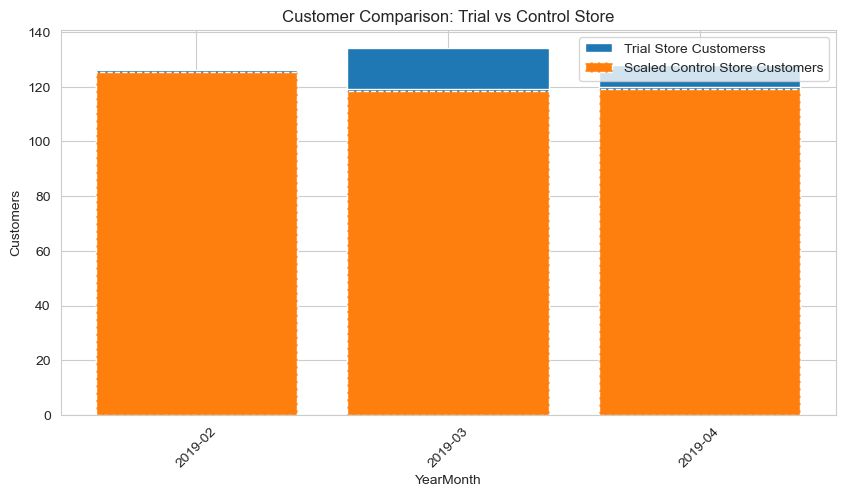

In [120]:
plt.figure(figsize=(10, 5))
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['nCustomers'], label='Trial Store Customerss')
plt.bar(trial_period_data ['YEARMONTH'], trial_period_data ['scaledControlCust'], label='Scaled Control Store Customers', linestyle='--')
plt.title('Customer Comparison: Trial vs Control Store')
plt.xlabel('YearMonth')
plt.ylabel('Customers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

**<span style="font-size:20px;">Conclusion</span>**

*<span style="font-size:16px;">
In the retail sector, strategic store layout plays a critical role in enhancing sales and customer experience. A recent analysis involving three trial stores (77, 86, and 88) compared against selected control stores (233, 155, and 237) highlighted the importance of layout optimization in a retail chain specializing in chips.</span>*

*<span style="font-size:16px;">The results were revealing: Stores 77 and 88 demonstrated a significant increase in sales during two of the three trial months when compared to their respective control stores. This indicates that the new layouts were effective in attracting more customers or increasing purchases, thereby validating the hypothesis that strategic design changes can positively impact store performance.</span>*

*<span style="font-size:16px;">
However, the analysis for Store 86 painted a different picture. This store did not exhibit any significant increase in sales during the trial period, suggesting that the new layout did not resonate as well with customers, or perhaps the implementation differed in some way from the other trial stores.</span>*

*<span style="font-size:16px;">
Based on these findings, several recommendations can be proposed. For stores 77 and 88, it would be prudent to roll out the new layout to other similar stores within the chain to replicate the success observed. As for Store 86, a deeper investigation into the trial implementation and external factors is necessary to understand the lack of impact. Depending on these insights, a revised strategy might be required.</span>*

*<span style="font-size:16px;">
In conclusion, while the trial layouts proved successful in most cases, the variation in results underscores the need for tailored strategies and continuous evaluation. By adopting a dynamic approach to store layout and being responsive to the specific needs and behaviors of customers, retailers can effectively enhance their store environments to boost sales and improve customer satisfaction. This project not only underscores the potential benefits of innovative layout designs but also highlights the importance of detailed analysis and adaptability in retail management strategies.</span>*